In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
books = pd.read_csv('books_without_url',index_col=0)
ratings = pd.read_csv('ratings_cleaned',index_col=0)
users = pd.read_csv('users_cleaned',index_col=0)

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [6]:
user_ratings = pd.merge(users,ratings,on='User-ID')
user_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,8,"timmins, ontario, canada",34,0002005018,5
1,8,"timmins, ontario, canada",34,074322678X,5
2,8,"timmins, ontario, canada",34,0887841740,5
3,8,"timmins, ontario, canada",34,1552041778,5
4,8,"timmins, ontario, canada",34,1567407781,6


In [7]:
books_user_ratings = pd.merge(user_ratings,books,on='ISBN')

In [8]:
books_user_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,116866,"ottawa, ,",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,123629,"kingston, ontario, canada",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,200273,"comber, ontario, canada",34,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [9]:
books_user_ratings.shape

(371248, 9)

## EDA 

In [10]:
n_books = len(books.index.unique())
n_ratings = len(ratings.index.unique())
n_users = len(users.index.unique())

In [11]:
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 433671
Number of unique books: 266729
Number of unique users: 278847
Average ratings per user: 1.56
Average ratings per book: 1.63


#### Sorting book titles with highest ratings

In [12]:
sorted_book_ratings = books_user_ratings.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)
sorted_book_ratings

Book-Title
Cecily Parsley's Nursery Rhymes (An Ariel Book)                                             10.0
Brewers Dictionary of Phrase and Fable Edition (Brewer's Dictionary of Phrase and Fable)    10.0
Do You Remember TV: The Book That Takes You Back                                            10.0
Tasha Tudor's Sampler                                                                       10.0
Good Morning, Heartache: A Philip Damon Mystery                                             10.0
                                                                                            ... 
How to Make It When You're Cash Poor                                                         1.0
Here We Are in Paradise: Stories                                                             1.0
I Hate the Dallas Cowboys : And Who Elected Them America's Team Anyway?                      1.0
Love's Tender Fury                                                                           1.0
Under the Roofs of 

In [13]:
ratings_data = pd.DataFrame(books_user_ratings.groupby('Book-Title')['Book-Rating'].mean())
ratings_data['Ratings-Count'] = pd.DataFrame(books_user_ratings.groupby('Book-Title')['Book-Rating'].count())
ratings_data.rename(columns = {'Book-Rating' : 'Average-Rating'},inplace=True)

In [14]:
ratings_data.head()

,Average-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Dark Justice,10.000000,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857,7
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000,2


In [15]:
ratings_data.shape

(132209, 2)

#### Distance plot for ratings count

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ratings-Count', ylabel='Density'>

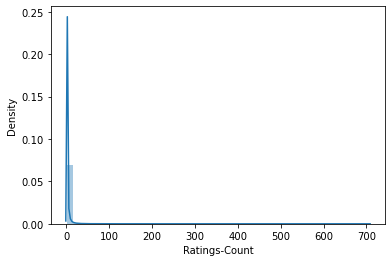

In [16]:
sns.distplot(ratings_data['Ratings-Count'])

#### Distance plot for average ratings

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average-Rating', ylabel='Density'>

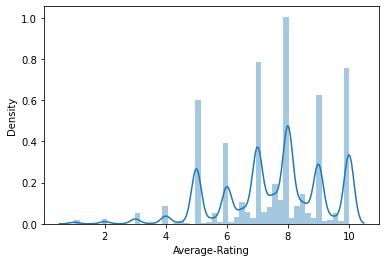

In [17]:
sns.distplot(ratings_data['Average-Rating'])

**There is extreme peak around 0 and peaks around 4 to 10 shows there are high number of books having count 0**

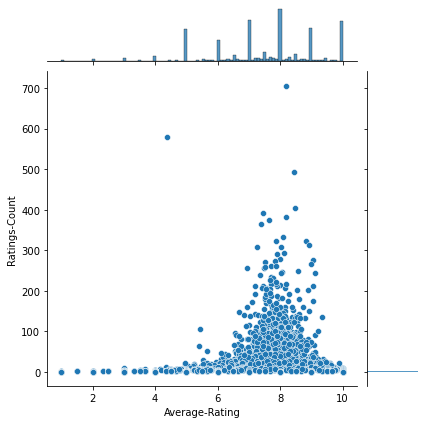

In [18]:
sns.jointplot(x = ratings_data['Average-Rating'], y = ratings_data['Ratings-Count'])

**The ratings are mostly given in the range of 6-9**

#### Aggregate total rating-count per user-id and sort top 10


In [19]:
user_freq = books_user_ratings[['User-ID', 'Book-Title']].groupby('User-ID').count().reset_index()
user_freq.columns = ['User-ID', 'Ratings-Count']
user_freq.sort_values(by='Ratings-Count', ascending=False).head(10)

,User-ID,Ratings-Count
23726,98391,5691
45585,189835,1898
37093,153662,1833
5521,23902,1102
56467,235105,1017
18458,76499,1011
3827,16795,956
41151,171118,954
59876,248718,935
13658,56399,820


#### Finding lowest and highest rated books

In [21]:
mean_rating = books_user_ratings[['Book-Rating', 'Book-Title']].groupby('Book-Title')[['Book-Rating']].mean()
mean_rating.sort_values(by='Book-Rating', ascending=False).head()

,Book-Rating
Book-Title,
Cecily Parsley's Nursery Rhymes (An Ariel Book),10.0
Brewers Dictionary of Phrase and Fable Edition (Brewer's Dictionary of Phrase and Fable),10.0
Do You Remember TV: The Book That Takes You Back,10.0
Tasha Tudor's Sampler,10.0
"Good Morning, Heartache: A Philip Damon Mystery",10.0


In [23]:
lowest_rated = mean_rating['Book-Rating'].idxmin()
books_user_ratings.loc[books_user_ratings['Book-Title'] == lowest_rated]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
252620,76499,"new york, new york, usa",34,0393093115,1,1848: The Revolutionary Tide in Europe (Revolu...,Peter N. Stearns,1974,W. W. Norton &amp; Company


In [24]:
highest_rated = mean_rating['Book-Rating'].idxmax()
books_user_ratings.loc[books_user_ratings['Book-Title'] == highest_rated]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
277439,98391,"morrow, georgia, usa",52,0399151788,10,Dark Justice,Jack Higgins,2004,Putnam Publishing Group


#### Top 10 rated books

In [25]:
books_stats = books_user_ratings.groupby('Book-Title')[['Book-Rating']].agg(['count', 'mean'])
books_stats.columns = books_stats.columns.droplevel()
books_stats.sort_values(by='count', ascending=False).head(10)

,count,mean
Book-Title,,
The Lovely Bones: A Novel,706,8.189802
Wild Animus,580,4.387931
The Da Vinci Code,493,8.438134
The Secret Life of Bees,404,8.475248
The Nanny Diaries: A Novel,391,7.437340
The Red Tent (Bestselling Backlist),382,8.178010
Bridget Jones's Diary,374,7.636364
A Painted House,364,7.390110
Life of Pi,334,8.092814


#### Create array of unique ISBN values, convert to series and then dataframe

In [26]:
book_ids = pd.unique(books_user_ratings['ISBN'].ravel())
book_ids = pd.Series(np.arange(len(book_ids)), book_ids)
book_ids = pd.DataFrame(book_ids)
book_ids.reset_index(inplace=True)
book_ids.rename(columns = {'index':'ISBN', 0:'Book-ID'}, inplace=True)
book_ids.head()

,ISBN,Book-ID
0,0002005018,0
1,074322678X,1
2,0887841740,2
3,1552041778,3
4,1567407781,4


#### Merging books_user_ratings with book_ids

In [27]:
books_user_ratings = pd.merge(books_user_ratings, book_ids, on='ISBN')
books_user_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-ID
0,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
1,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,116866,"ottawa, ,",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,123629,"kingston, ontario, canada",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,200273,"comber, ontario, canada",34,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [28]:
books_user_ratings.shape

(371248, 10)

In [38]:
books_user_ratings.to_csv('final.csv')

## Compressed Sparse Row Matrix

In [33]:
from scipy.sparse import csr_matrix

def create_matrix(df):
      
    N = len(df['User-ID'].unique())
    M = len(df['Book-ID'].unique())
      
    # Map IDs to indices
    user_mapper = dict(zip(np.unique(df["User-ID"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["Book-ID"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["User-ID"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["Book-ID"])))
      
    user_index = [user_mapper[i] for i in df['User-ID']]
    book_index = [book_mapper[i] for i in df['Book-ID']]
  
    X = csr_matrix((df["Book-ID"], (book_index, user_index)), shape=(M, N))
      
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

#### Feeding values to create matrix function

In [34]:
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(books_user_ratings)

## K-Nearest Neighbors

In [35]:
from sklearn.neighbors import NearestNeighbors

def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    book_vec = book_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

#### Assign books to dictionary

In [36]:
book_titles = dict(zip(books_user_ratings['Book-ID'], books_user_ratings['Book-Title']))

In [37]:
ISBN_id = 3931
similar_ids = find_similar_books(ISBN_id, X, k=10)
book_title = book_titles[ISBN_id
  
print(f"Since you read {book_title}:")
for i in similar_ids:
    print(book_titles[i])

Since you read My Soul to Keep:
Steal Away
Folk Wisdom of Mexico / Proverbios y dichos mexicanos
Trauma
Increase Your Web Traffic In a Weekend, Revised Edition
Bone House
The Unspeakable
WISE GUY
Legacy of Love
This Widowed Land
The Godfather


In [39]:
url = pd.read_csv('books_with_url.csv')
url = pd.merge(url, book_ids, on='ISBN')

In [40]:
url.head()

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
0,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0
1,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2824
2,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,31022
3,5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,25853
4,6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,42392


In [41]:
url.to_csv('url.csv')